<a href="https://colab.research.google.com/github/JS-DS-coder/CienciaDeDatos2021/blob/master/Proyecto_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Proyecto Final**

Jairo Salazar

Carnet : 21000887 

***Parte I - Analisis exploratorio de Datos***


 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd





In [3]:
#carga de dataset y slicin de los datos
def slicingDataset (ds,inicio,porcentaje):
  cantidad = int(np.round(ds.shape[0] * porcentaje,0))
  return ds[inicio:inicio+cantidad,0:6]
  


Dataset = np.load('proyecto_training_data.npy')
print (Dataset.shape)
dsEntrenamiento = slicingDataset(Dataset,0,0.80)
dsTest = slicingDataset(Dataset,int(dsEntrenamiento.shape[0])-1,0.20)
print (dsTest.shape)
print (dsEntrenamiento.shape)


(1460, 6)
(292, 6)
(1168, 6)


                     precio  OverallQuality  ...  YearBuilt  lotfrontage
precio             1.000000        0.793990  ...   0.534171     0.363292
OverallQuality     0.793990        1.000000  ...   0.567313     0.242420
1stFloorSQF        0.616289        0.469411  ...   0.292074     0.417388
TotalRoomsabvgrnd  0.564707        0.444293  ...   0.122911     0.341005
YearBuilt          0.534171        0.567313  ...   1.000000     0.121474
lotfrontage        0.363292        0.242420  ...   0.121474     1.000000

[6 rows x 6 columns]
-------------------------------
       Precio de Venta
Media:  180590.27739726027
Valor Maximo:  755000.0
Valor Minimo:  34900.0
Rango:  720100.0
Desviacion Standard:  78781.95108033362
-------------------------------
       Overall Quality
Media:  6.101027397260274
Valor Maximo:  10.0
Valor Minimo:  1.0
Rango:  9.0
Desviacion Standard:  1.377435193240741
-------------------------------
       1st Floor SFT
Media:  1156.3236301369864
Valor Maximo:  3228.0
Valor M

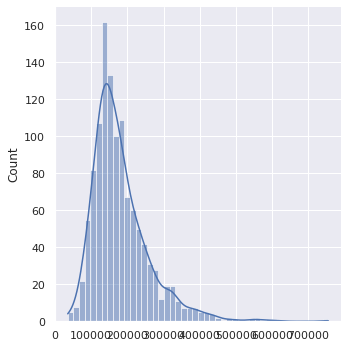

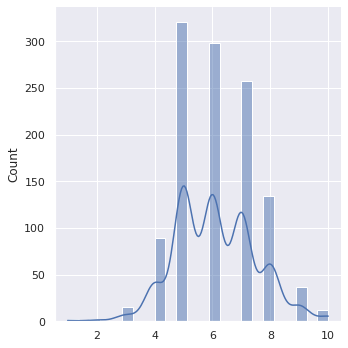

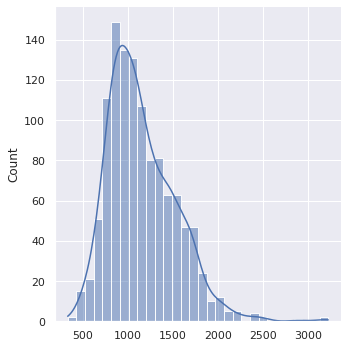

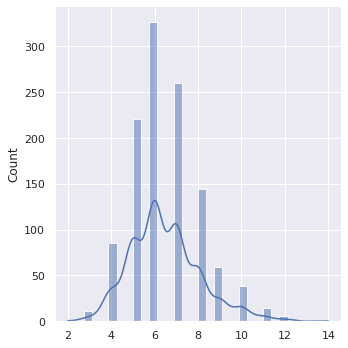

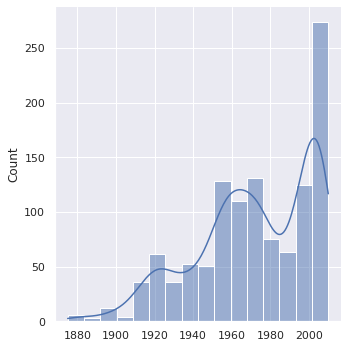

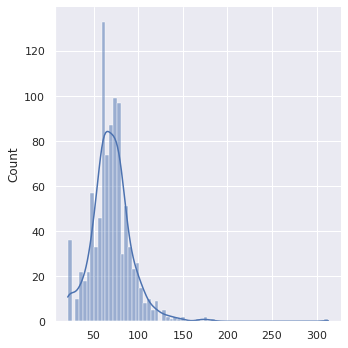

In [4]:
#Analisis Exploratorio de los datasets
#calculando media, valor maximo, valor minimo, rango, desviacion estandard.
def dimensiones (ds,columna,nombre):
 
  dimension = ds[0:ds.shape[0],columna-1:columna]
  #correl = np.corrcoef(precio,dimension)
  dimension = dimension[np.logical_not(np.isnan(dimension))]
  media = np.mean(dimension)
  valmax = np.max(dimension)
  valmin = np.min(dimension)
  desvstd  = np.std(dimension)
  rango    = np.ptp(dimension)

  print('-------------------------------')
  print('      ', nombre)
  print ('Media: ',media)
  print ('Valor Maximo: ',valmax)
  print ('Valor Minimo: ',valmin)
  print ('Rango: ',rango)
  print ('Desviacion Standard: ',desvstd)
  #print ('Correlacion: ',correl)
  sb.set_theme()
  #print(dimension.shape)
  sb.displot(dimension,kde=True)
 


dsPanda = pd.DataFrame(data=dsEntrenamiento,columns=["precio","OverallQuality","1stFloorSQF","TotalRoomsabvgrnd","YearBuilt","lotfrontage"])
dsPanda.head()
corrpearson = dsPanda.corr(method="pearson")

print(corrpearson)


dimensiones(dsEntrenamiento,1,"Precio de Venta")
dimensiones(dsEntrenamiento,2,"Overall Quality")
dimensiones(dsEntrenamiento,3,"1st Floor SFT")
dimensiones(dsEntrenamiento,4,"Total Rooms above grade")
dimensiones(dsEntrenamiento,5,"Years Built")
dimensiones(dsEntrenamiento,6,"Lot Frontage")

***Correlacion de los datos***

A continuacion encontrara la correlacion entre las diferentes cualidades de las propiedades y el precio. 

Encontrara primero cada grafico de correlacion siendo Y = Precio, x = Cualquiera de las cinco caracteristicas del set de Datos: 

1. OverallQuality
2. 1stFlrSF
3. TotRmsAbvGrd
4. YearBuilt
5. LotFrontage

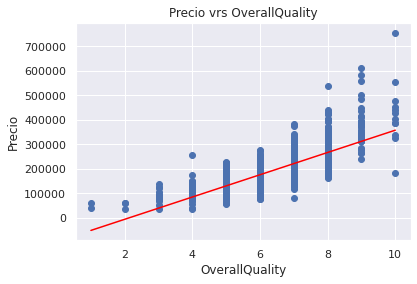

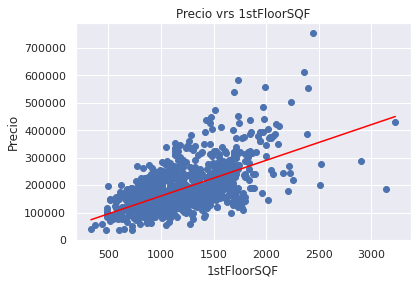

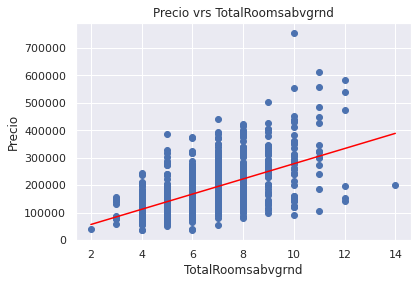

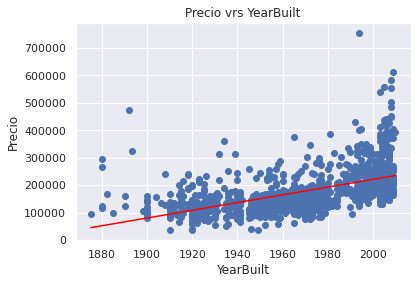

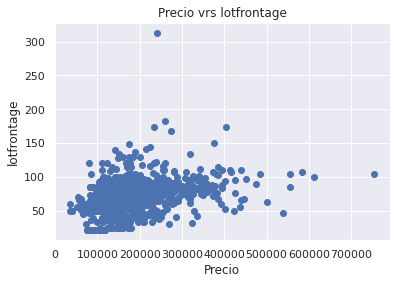

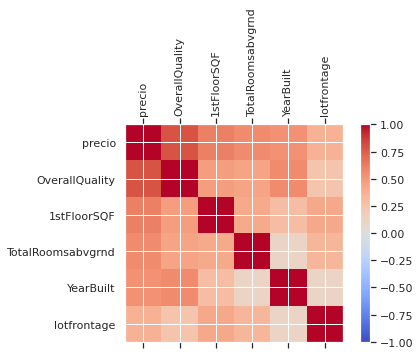

In [5]:
def GraficarCorrelacion (x,y,titulo,xtitulo,ytitulo,color1):
  plt.scatter(x,y)
  plt.title(titulo)
  plt.xlabel(xtitulo)
  plt.ylabel(ytitulo)
  plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color=color1)
  plt.show()





y = dsPanda['precio']
x = dsPanda['OverallQuality']

GraficarCorrelacion(x,y,'Precio vrs OverallQuality','OverallQuality','Precio','red')

x = dsPanda['1stFloorSQF']
GraficarCorrelacion(x,y,'Precio vrs 1stFloorSQF','1stFloorSQF','Precio','red')

x = dsPanda['TotalRoomsabvgrnd']
GraficarCorrelacion(x,y,'Precio vrs TotalRoomsabvgrnd','TotalRoomsabvgrnd','Precio','red')

x = dsPanda['YearBuilt']
GraficarCorrelacion(x,y,'Precio vrs YearBuilt','YearBuilt','Precio','red')

x = dsPanda['lotfrontage']

GraficarCorrelacion(y,x,'Precio vrs lotfrontage','Precio','lotfrontage','red')






fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corrpearson,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(dsPanda.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(dsPanda.columns)
ax.set_yticklabels(dsPanda.columns)
plt.show()


#preciocasas = dsEntrenamiento[0:dsEntrenamiento.shape[0],0:1]
#ovq = dsEntrenamiento[0:dsEntrenamiento.shape[0],1:2]








In [32]:
# Modelo
def FuncRegLineal (varx,vary,epochs,imprimir_error_cada,lr,valorMB):

  #dsmatrix = np.append(varx,  np.full(varx.shape,1),axis=1)
  dsmatrix = varx
  erroriteracion = np.empty((0,2),np.double)
  i=0
  while (i <= epochs):
    yhat = (varx*valorMB[0]) + valorMB[1]
    error = 0.5 *(np.average(np.power((vary-yhat),2)))
  #errores = np.append(errores,error)
    gradientem = np.average((yhat-vary)*varx)
    gradienteb = np.average((yhat-vary))
    valorMB[0]=valorMB[0] - (lr*gradientem)
    valorMB[1]=valorMB[1] - (lr*gradienteb)
    print (i)
    Resultado = {i : {'m' : valorMB[0],
                      'b' : valorMB[1],
                      'gradientem' : gradientem,
                      'gradienteb' : gradienteb,
                      'error' : error}}
    erroriteracion = np.append(erroriteracion,np.array([[i,error]]),axis=0)
    i+=1
  print (Resultado)
  return erroriteracion

ax=np.array([[65,80,68]]) 
ay=[208.5,181.5,223.5]                    
print (ax)
#zz= FuncRegLineal(dsEntrenamiento[0:3,1:2],dsEntrenamiento[0:3,0:1],3,1,0.001,[0,0])
zz= FuncRegLineal(ax,ay,3,1,0.001,[0,0])
print (zz)

[[65 80 68]]
0
1
2
3
{3: {'m': -786.3984458052721, 'b': -10.972411532346001, 'gradientem': 982486.3302982721, 'gradienteb': 13720.487875346002, 'error': 94952328.83301342}}
[[0.00000000e+00 2.10611250e+04]
 [1.00000000e+00 3.41918326e+05]
 [2.00000000e+00 5.69349205e+06]
 [3.00000000e+00 9.49523288e+07]]
